In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('seaborn-v0_8-white')
import numpy as np
import pandas as pd

# Пример: эффект выходных на рождаемость в США

Мы уже использовали набор данных с рождаемостью в США, давайте начнем с аналогичной процедуры очистки данных:

In [8]:
import datetime

births = pd.read_csv('notebooks/data/births.csv')

quartiles = np.percentile(births['births'], [25, 50, 75])
mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

births['day'] = births['day'].astype(int)

births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format='%Y%m%d')
births_by_date = births.pivot_table('births', [births.index.month, births.index.day])
births_by_date.index = [datetime.datetime(2012, month, day) for (month, day) in births_by_date.index]

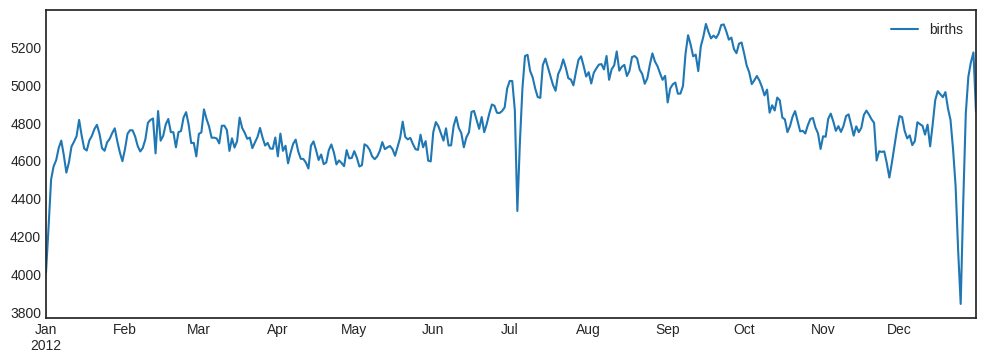

In [9]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);

Когда мы работаем с такими данными как эти, то часто бывает полезным анотировать некоторые моменты на графике. Это можно сделать вручную с командами `plt.text`/`ax.text`, которые разместят текст именно на указанные x и y:

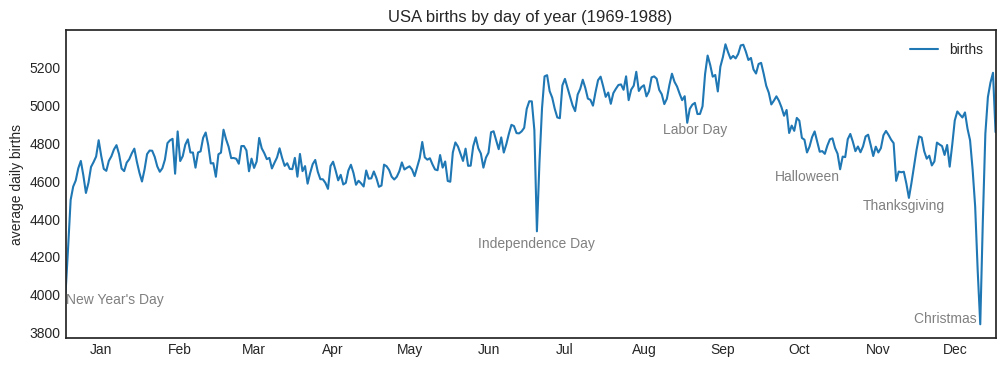

In [10]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# Add labels to the plot
style = dict(size=10, color='gray')

ax.text('2012-1-1', 3950, "New Year's Day", **style)
ax.text('2012-7-4', 4250, "Independence Day", ha='center', **style)
ax.text('2012-9-4', 4850, "Labor Day", ha='center', **style)
ax.text('2012-10-31', 4600, "Halloween", ha='right', **style)
ax.text('2012-11-25', 4450, "Thanksgiving", ha='center', **style)
ax.text('2012-12-25', 3850, "Christmas ", ha='right', **style)

# Label the axes
ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average daily births')

# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

Метод `ax.text` принимает позицию x и y, строку и необязательный аргумент задающий цвет, размер, стиль, выравнивание и другие свойства.

# Преобразования и положение текста

В предыдущем примере мы заякорили текст на определенные данные. Иногда бывает нужно заякорить текст на позицию по осям или фигуру, независимо от данных. В Matplotlib это выполняется с помощью модификации `transform`. 

Каждый графический фреймворк нуждается в какой-либо схеме трансляции между системами координат. Например, точка $(x, y) = (1, 1)$ должна, каким-либо образом, быть представлена на изображении, которое, в свою очередь, должно быть представлено в каких-то пикселях на экране. Математически такое преобразование достаточно простое и Matplotlib имеет набор инструментов, которые используются для таких преобразований (модуль `matplotlib.transforms`).

Обычный пользователь не должен волноваться по поводу этих преобразований, но знание о них может быть полезным. Существуют три, предварительно определенных, трансформации, которые могут быть полезны в этой ситуации:

* `ax.transData` - трансформация, связанная с координатами данных
* `ax.transAxes` - трансформация, связанная с осями (в единицах измерения осей)
* `fig.transFigure` - трансформация, связаная с изображением (в единицах измерения изображения).

Давайте посмотрим на пример отрисовки текста в различных местах:

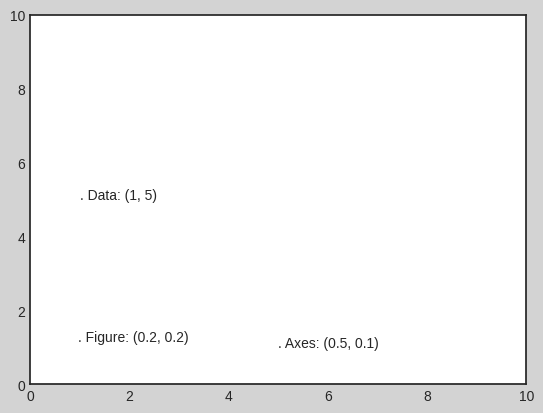

In [11]:
fig, ax = plt.subplots(facecolor='lightgray')
ax.axis([0, 10, 0, 10])

# transform=ax.transData is the default, but we'll specify it anyway
ax.text(1, 5, ". Data: (1, 5)", transform=ax.transData)
ax.text(0.5, 0.1, ". Axes: (0.5, 0.1)", transform=ax.transAxes)
ax.text(0.2, 0.2, ". Figure: (0.2, 0.2)", transform=fig.transFigure);

Обратите внимание, что по умолчанию текст выравнивается вверх и влево от указанной координаты (точка примерно задает координату).

Координаты `transData` дают обычные координаты, связанные с метками осей x и y. Координаты `transAxes` дают положение от левого нижнего угла осей (весь белый квадрат) в виде долей от размера осей. Координаты `transFigure` похожи, но указывают позицию от левого нижнего угла изображения (весь серый кант) в виде долей от размера изображения.

Обратите внимание, что если мы изменим пределы осей, то только координаты `transData` будут изменены, в то время как другие останутся на месте:

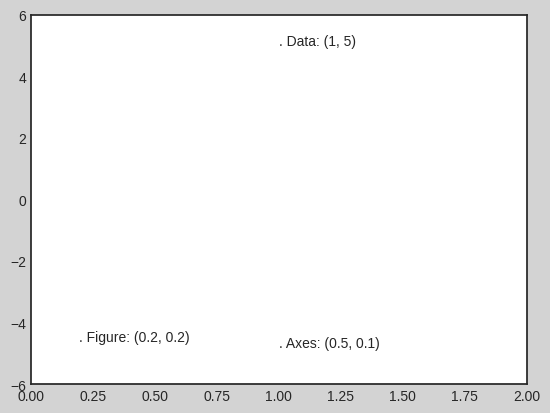

In [12]:
ax.set_xlim(0, 2)
ax.set_ylim(-6, 6)
fig

# Стрелки и подписи

Хотя в Matplotlib доступна функция `plt.arrow()`, я бы не рекомендовал её использовать: она создает объект SVG и он будет подвержен различным степеням сжатия экрана и т.д. Вместо этого рекомендуется использовать функцию `plt.annotate()`. Эта функция создаёт некоторый текст и стрелку, и существуют очень гибкие способы задать стрелку.

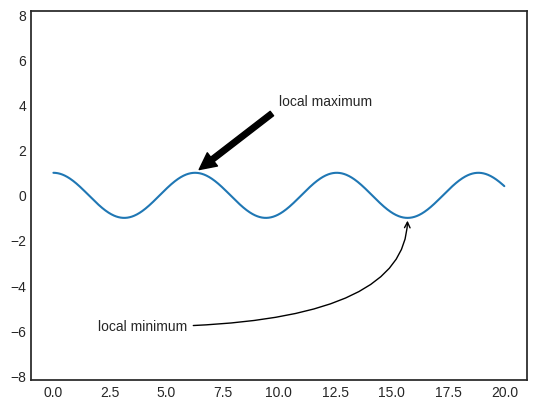

In [14]:
%matplotlib inline

fig, ax = plt.subplots()

x = np.linspace(0, 20, 1000)
ax.plot(x, np.cos(x))
ax.axis('equal')

ax.annotate('local maximum', xy=(6.28, 1), xytext=(10, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.annotate(
    'local minimum',
    xy=(5 * np.pi, -1),
    xytext=(2, -6),
    arrowprops=dict(arrowstyle="->", connectionstyle="angle3,angleA=0,angleB=-90")
);

Стрелка задаётся через словарь `arrowprops`, который имеет большое количество опций. Эти опции достаточно хорошо задокументированы в Matplotlib. Давайте посмотрим как это всё работает с данными о рождаемости:

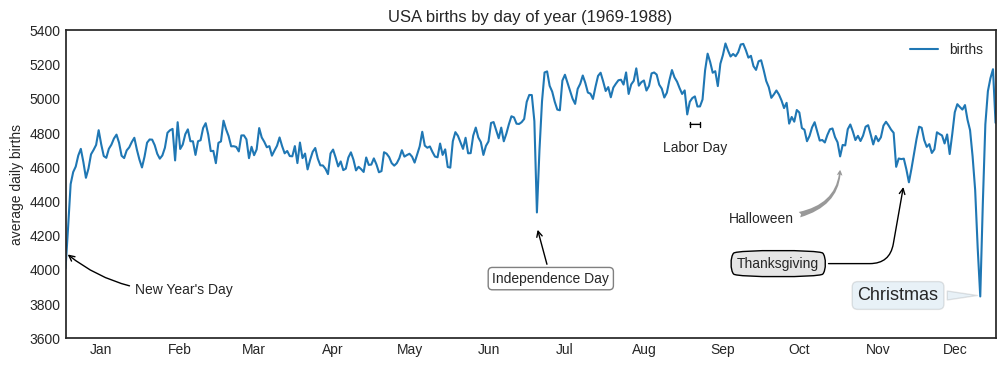

In [15]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# Add labels to the plot
ax.annotate("New Year's Day", xy=('2012-1-1', 4100),  xycoords='data',
            xytext=(50, -30), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=-0.2"))

ax.annotate("Independence Day", xy=('2012-7-4', 4250),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(10, -40), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))

ax.annotate('Labor Day', xy=('2012-9-4', 4850), xycoords='data', ha='center',
            xytext=(0, -20), textcoords='offset points')
ax.annotate('', xy=('2012-9-1', 4850), xytext=('2012-9-7', 4850),
            xycoords='data', textcoords='data',
            arrowprops={'arrowstyle': '|-|,widthA=0.2,widthB=0.2', })

ax.annotate('Halloween', xy=('2012-10-31', 4600),  xycoords='data',
            xytext=(-80, -40), textcoords='offset points',
            arrowprops=dict(arrowstyle="fancy",
                            fc="0.6", ec="none",
                            connectionstyle="angle3,angleA=0,angleB=-90"))

ax.annotate('Thanksgiving', xy=('2012-11-25', 4500),  xycoords='data',
            xytext=(-120, -60), textcoords='offset points',
            bbox=dict(boxstyle="round4,pad=.5", fc="0.9"),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle,angleA=0,angleB=80,rad=20"))


ax.annotate('Christmas', xy=('2012-12-25', 3850),  xycoords='data',
             xytext=(-30, 0), textcoords='offset points',
             size=13, ha='right', va="center",
             bbox=dict(boxstyle="round", alpha=0.1),
             arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1));

# Label the axes
ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average daily births')

# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

ax.set_ylim(3600, 5400);